## Post processing OPM output files

- Docs & tutes here
    - https://api.resinsight.org/en/main/PythonExamples.html
    - https://www.youtube.com/watch?v=Oez2UbpLU2A


In [12]:

# Import the ResInsight Processing Server Module
import rips

# Connect to ResInsight
resinsight = rips.Instance.find()


Trying port 50051
Trying port 50052
Trying port 50053
Trying port 50054
Trying port 50055
Trying port 50056
Trying port 50057
Trying port 50058
Trying port 50059
Trying port 50060
Trying port 50061
Trying port 50062
Trying port 50063
Trying port 50064
Trying port 50065
Trying port 50066
Trying port 50067
Trying port 50068
Trying port 50069
Trying port 50070
Error: Could not find any ResInsight instances responding between ports 50051 and 50071


In [13]:
if resinsight == None:
    resinsight=rips.Instance.launch("/usr/bin/ResInsight")

Trying port 50051
Port 50051
Trying to launch /usr/bin/ResInsight


qt.qpa.xcb: QXcbConnection: XCB error: 5 (BadAtom), sequence: 1239, resource id: 0, major code: 19 (DeleteProperty), minor code: 0


#### Notes
    - In the following example, the simulation output files need to be loaded in the ResInsight software through the UI (ie manually)

In [11]:
if resinsight is not None:
    # Get a list of all cases
    cases = resinsight.project.cases()

    print("Got " + str(len(cases)) + " cases: ")
    for case in cases:
        print("Case id: " + str(case.id))
        print("Case name: " + case.name)
        print("Case type: " + case.__class__.__name__)
        print("Case file name: " + case.file_path)
        print("Case reservoir bounding box:", case.reservoir_boundingbox())

        timesteps = case.time_steps()
        for t in timesteps:
            print("Year: " + str(t.year))
            print("Month: " + str(t.month))

        if isinstance(case, rips.EclipseCase):
            print("Getting coarsening info for case: ", case.name, case.id)
            coarsening_info = case.coarsening_info()
            if coarsening_info:
                print("Coarsening information:")

            for c in coarsening_info:
                print(
                    "[{}, {}, {}] - [{}, {}, {}]".format(
                        c.min.x, c.min.y, c.min.z, c.max.x, c.max.y, c.max.z
                    )
                )


Got 2 cases: 
Case id: 0
Case name: CO2STORE
Case type: EclipseCase
Case file name: /home/ip/gitlab.com/quaisr/labs/applications/co2-storage/CO2-test-case/CO2STORE.EGRID
Case reservoir bounding box: max_x: 100.0
max_y: 100.0
min_z: -100.0

Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Year: 2019
Month: 1
Getting coarsening info for case:  CO2STORE 0
Case id: 1
Case name: GASSNOVA_SIMULATION_MODEL_FF_SMEAHEIA_21
Case type: EclipseCase
Case fil

In [14]:
## Try loading a case through the script

case=resinsight.project.load_case("./CO2-storage-Smeaheia/CO2-Smeaheia-case/GASSNOVA_SIMULATION_MODEL_FF_SMEAHEIA_21.EGRID")
## This one still loads it in the UI. Will have to check how to load cases without the GUI showing up

In [19]:
case_summary=resinsight.project.import_summary_case("./CO2-storage-Smeaheia/CO2-Smeaheia-case/GASSNOVA_SIMULATION_MODEL_FF_SMEAHEIA_21.SMSPEC")

In [22]:
times=case_summary.summary_vector_values("TIME")
print(times.values)

[1, 2922, 7305, 7486, 7670, 7852, 8036, 8217, 8401, 8582, 8766, 8947, 9131, 9313, 9497, 9678, 9862, 10043, 10227, 10408, 10592, 10774, 10958, 11139, 11323, 11504, 11688, 11869, 12053, 12235, 12419, 12600, 12784, 12965, 13149, 13330, 13514, 13696, 13880, 14061, 14245, 14426, 14610, 14791, 14975, 15157, 15341, 15522, 15706, 15887, 16071, 16252, 16436, 16618, 16802, 16983, 17167, 17348, 17532, 17713, 17897, 18079, 18263, 18444, 18628, 18809, 18993, 19174, 19358, 19540, 19724, 19905, 20089, 20270, 20454, 20635, 20819, 21001, 21185, 21366, 21550, 21731, 21915, 22280, 22646, 23011, 23376, 23741, 24107, 24472, 24837, 25202, 25568, 25933, 26298, 26663, 27029, 27394, 27759, 28124, 28490, 28855, 29220, 29585, 33238, 36890, 40542, 44194, 47847, 51499, 55152, 58804, 62457, 66109]


In [ ]:
times=case_summary.summary_vector_values("TIME")
print(times.values)

In [25]:
fpr=case_summary.summary_vector_values("FPR")
print(fpr.values)

[151.07, 151.07, 125.695, 124.648, 123.584, 122.532, 121.469, 120.423, 119.359, 118.313, 117.25, 116.204, 115.14, 114.089, 113.026, 111.98, 110.917, 109.871, 108.808, 107.762, 106.699, 105.648, 104.585, 103.54, 102.477, 101.54, 100.615, 99.7241, 98.8557, 98.0222, 97.1821, 96.37, 95.5721, 94.7979, 94.021, 93.2862, 92.5449, 91.8342, 91.1084, 90.4242, 89.7531, 89.0902, 88.4264, 87.7863, 87.1383, 86.5289, 85.9132, 85.3208, 84.7289, 84.173, 83.6097, 83.0669, 82.5285, 82.0138, 81.5082, 81.0398, 80.5609, 80.1083, 79.6759, 79.2669, 78.8739, 78.4752, 78.1003, 77.7467, 77.4008, 77.084, 76.7699, 76.4796, 76.1987, 75.9274, 75.6818, 75.4342, 75.2137, 75.0021, 74.7873, 74.5747, 74.3574, 74.148, 73.9286, 73.7169, 73.5057, 73.2776, 73.063, 72.6307, 72.1703, 71.7092, 71.2583, 70.8167, 70.3666, 69.894, 69.4147, 68.9553, 69.424, 69.7589, 70.0356, 70.2728, 70.5397, 70.876, 71.2758, 71.6771, 72.0562, 72.4237, 72.799, 73.1275, 75.7243, 77.2641, 78.138, 78.6997, 79.0897, 79.3704, 79.5572, 79.7106, 79.8473, 7

In [26]:
import matplotlib.pyplot as plt

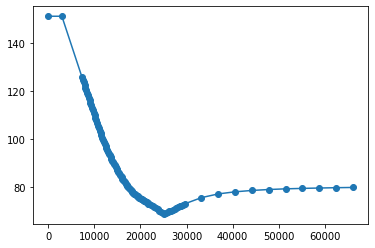

In [28]:
plt.plot(times.values, fpr.values, marker='o')